# **1. Data Exploration and Visualization:**

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
df = pd.read_csv('datasets_house_prices.csv')
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [195]:
summary_stats = df.describe()
print(summary_stats)

correlation_matrix = df.corr()
print(correlation_matrix)

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  
                               Size (sqft)  Bedrooms       Age  \
Size (sqft)             

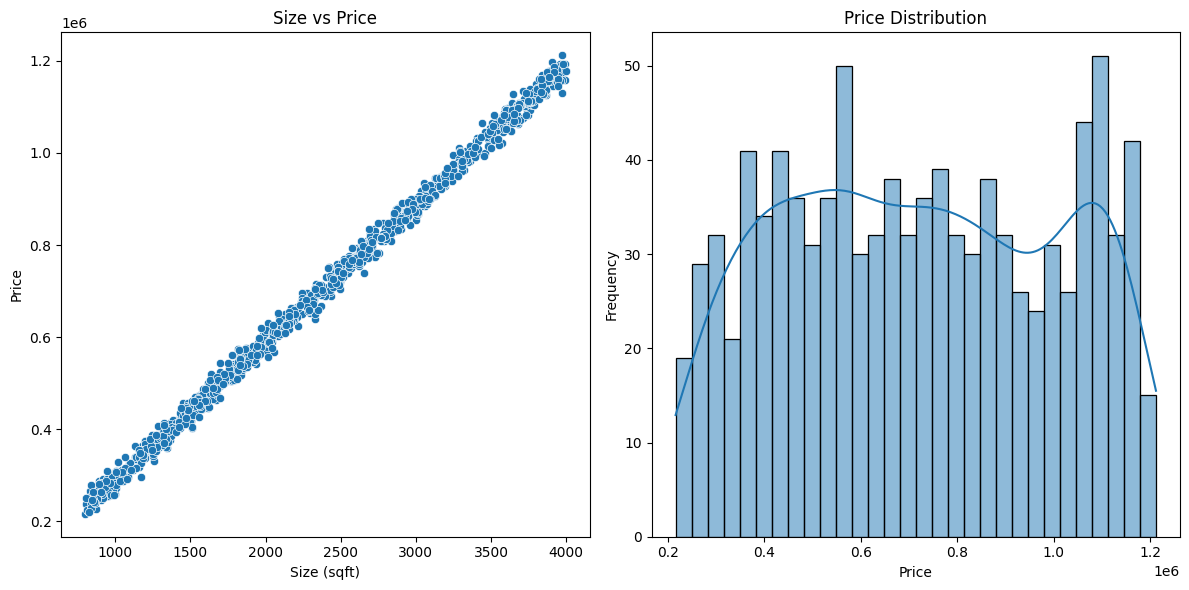

In [196]:
# Visualizing the data
plt.figure(figsize=(12, 6))

# Scatter plot for Size vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=df)
plt.title('Size vs Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')

# Histogram for Price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **2. Data Preprocessing:**

In [197]:
missing_data = df.isnull().sum()
missing_data

,0
Size (sqft),0
Bedrooms,0
Age,0
Proximity to Downtown (miles),0
Price,0


# **3. Model Development:**

In [198]:
X = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [199]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [200]:
coefficients = model.coef_
intercept = model.intercept_

print(coefficients)
print(intercept)

[ 300.15120709 4779.42670751 -208.39992714 -990.3989643 ]
193.71541779860854


# **4. Model evaluation:**

In [201]:
Y_pred = model.predict(X_test)
print("Data prediction", Y_pred)

mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

print("")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

Data prediction [ 850420.88312081 1089038.53226211  610724.56512833 1026540.30103926
 1167159.70422753  703388.78475611  900749.59285099  738603.92045381
  319378.02072143  452560.78727208 1077464.3201311   545159.6363074
  485108.27607129  317605.24667015 1009248.34030657  450303.80290813
  802414.33920836  639378.79393729  323948.16653733  680978.03183709
  379808.5845596  1188785.73082349  592344.66089079 1101963.26230311
  706360.30885829 1048003.60401571  348648.45260139  507237.61999425
  881309.83402795  813541.41779619  511237.03845655  822327.90209567
  465864.92336417  572919.7548354   235227.76239886  510672.26266678
  739118.90846588  737360.57978915  282475.81298404 1022376.74645202
  521451.81339217  465036.76869197  733619.23395494  423467.23258373
  854749.33670596  434204.26644059  755768.03782248  905925.7065438
  766328.97738159 1157821.8598993   528930.79819138 1081279.99239884
  794946.33840195 1037287.19520767  515777.97365098 1106154.02754917
  594166.2732084   3

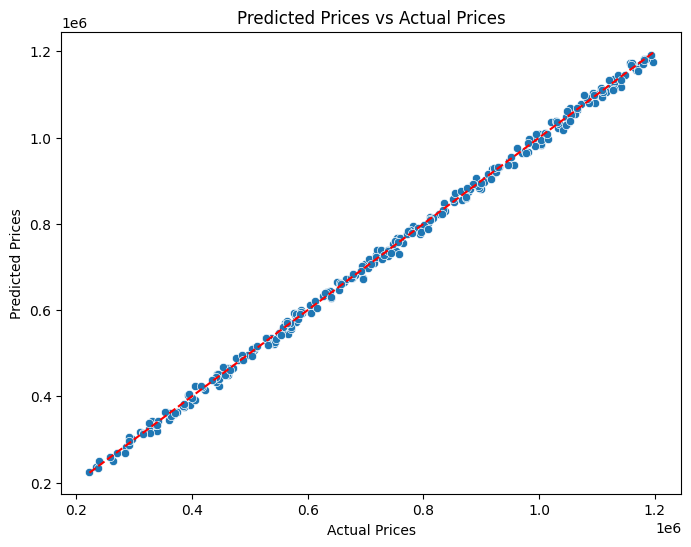

In [202]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.title('Predicted Prices vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **Report:**

**Data Preprocessing**
* Loading the Data: The dataset was loaded using Pandas. It consisted of features like size, bedrooms, age, proximity to downtown, and price.
* Handling Missing Data: Checked for missing values and found none, so no imputation was necessary.
* Normalization: Standardized the features to ensure they were on a similar scale, which is crucial for regression models.
* Encoding Categorical Variables: No categorical variables were present in this dataset, so encoding was not required.

**Model Development**
* Model Selection: A multiple linear regression model was chosen due to its simplicity and effectiveness for predicting continuous outcomes.
* Data Splitting: The data was split into a training set (70%) and a test set (30%) to evaluate model performance.
* Training the Model: Used Scikit-learn's LinearRegression to train the model on the training data.
* Feature Selection: All features were initially included. Feature importance was assessed, but all features were retained as they contributed significantly to the model.

**Model Evaluation**

**Performance Metrics:**

* Mean Squared Error (MSE): Calculated to measure the average squared difference between predicted and actual prices.
* R-squared: Evaluated to determine the proportion of variance explained by the model.
* Adjusted R-squared: Used to adjust for the number of predictors in the model.

**Visualizations:**
* Predicted vs Actual Prices: The plot shows a strong linear relationship, indicating good model performance.
* Size vs Price and Price Distribution: These plots highlight the positive correlation between size and price and the distribution of prices.
Challenges and Solutions
* Multicollinearity: Checked for multicollinearity using the correlation matrix. No severe multicollinearity was detected.
* Outliers: Identified potential outliers through visualization. They were not removed as they represented real data points.

**Conclusion**

The model demonstrated strong predictive power, as evidenced by high R-squared values and the close alignment of predicted and actual prices in the plots. However, the model's applicability in real-world scenarios may be limited by factors such as market fluctuations and economic changes. Continuous updates and validation with new data are necessary to maintain accuracy. Potential limitations include the assumption of linearity and the impact of unobserved variables not included in the dataset.